In [40]:
#%matplotlib notebook
from matplotlib import style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import date
from sqlalchemy import cast, DATE
import datetime
import time
from datetime import datetime, timedelta

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

<b><font color='blue'>*_Finding the Column Names_*<font></b>


In [10]:
#To grab the columns of the tables Measurement and Station
inspector = inspect(engine)

#Grab the Measurement Columns
columnsMeasurement = inspector.get_columns('Measurement')
print("-"*20)
print('Measurment Columns')
print("-"*20)
for col in columnsMeasurement:
    print(col['name'], col['type'])

    
print("")
print("")
print("")

#Grab the Station Columns
columnsStation = inspector.get_columns('Station')
print("-"*20)
print('Station Columns')
print("-"*20)
for col in columnsStation:
    print(col['name'], col['type'])

--------------------
Measurment Columns
--------------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT



--------------------
Station Columns
--------------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis
    
   _# Design a query to retrieve the last 12 months of precipitation data and plot the results_

<b><font color='blue'>_(1) Grabbing Last Year Same Day, for 12 months period_</font>

In [14]:
# Calculate the date 1 year ago from today

def getRequestedDate(daysSince):
    #Getting the date details
    lastYearSameDay = datetime.now() - timedelta(days=daysSince)

    #Getting the year
    year = lastYearSameDay.year

    #Getting the day and making sure it is 2 digit
    day = lastYearSameDay.day
    if len(str(day)) == 1:
        day = '0' + str(day)

    #Getting the month and making sure it is 2 digit
    month = lastYearSameDay.month
    if len(str(month)) == 1:
        month = '0' + str(month)

    #Constructing the date
    requestedDate = str(year) + "-" + str(month) + "-" + str(day)
    return requestedDate

<b><font color='blue'>_(2) Querying the data for last 365 days_</font>

In [52]:
# Perform a query to retrieve the date and precipitation scores
measurementData365 = session.query(Measurement.date, 
              Measurement.prcp ).\
             filter(Measurement.date > getRequestedDate(365) ).all()
measurementData365

[('2017-08-19', 0.0),
 ('2017-08-20', 0.0),
 ('2017-08-21', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-21', 0.02),
 ('2017-08-23', 0.0),
 ('2017-08-19', None),
 ('2017-08-21', None),
 ('2017-08-22', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-19', 0.09),
 ('2017-08-20', None),
 ('2017-08-21', 0.56),
 ('2017-08-22', 0.5),
 ('2017-08-23', 0.45)]

<b><font color='blue'>_(2.1) Querying the data for entire dataset_</font>

In [53]:
# Perform a query to retrieve the date and precipitation scores
measurementData = session.query(Measurement.date, 
              Measurement.prcp).all()
measurementData

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

<b><font color='blue'>_(3) Storing List of Tuples into Dataframe and resetting index for last 365 days_</font>

In [59]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df365 = pd.DataFrame(measurementData365, columns=['date', 'percipitation'])
df365 = df365.set_index('date')

##Sort the dataframe by date
df365.sort_index()
df365.head(10)

,percipitation
date,
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00
2017-08-22,0.00
2017-08-23,0.00
2017-08-19,0.00
2017-08-20,0.01
2017-08-21,0.02
2017-08-23,0.00


<b><font color='blue'>_(3.1) Storing List of Tuples into Dataframe and resetting index for entire data set_</font>

In [60]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dfAll = pd.DataFrame(measurementData, columns=['date', 'percipitation'])
dfAll = dfAll.set_index('date')

##Sort the dataframe by date
dfAll.sort_index()
dfAll.head(10)

,percipitation
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN
2010-01-07,0.06
2010-01-08,0.00
2010-01-09,0.00
2010-01-10,0.00


In [61]:
print(len(df365))
print(len(dfAll))

18
19550


<b><font color='blue'>_(4) Visualizing the time series data for last 365 days_</font>

<IPython.core.display.Javascript object>


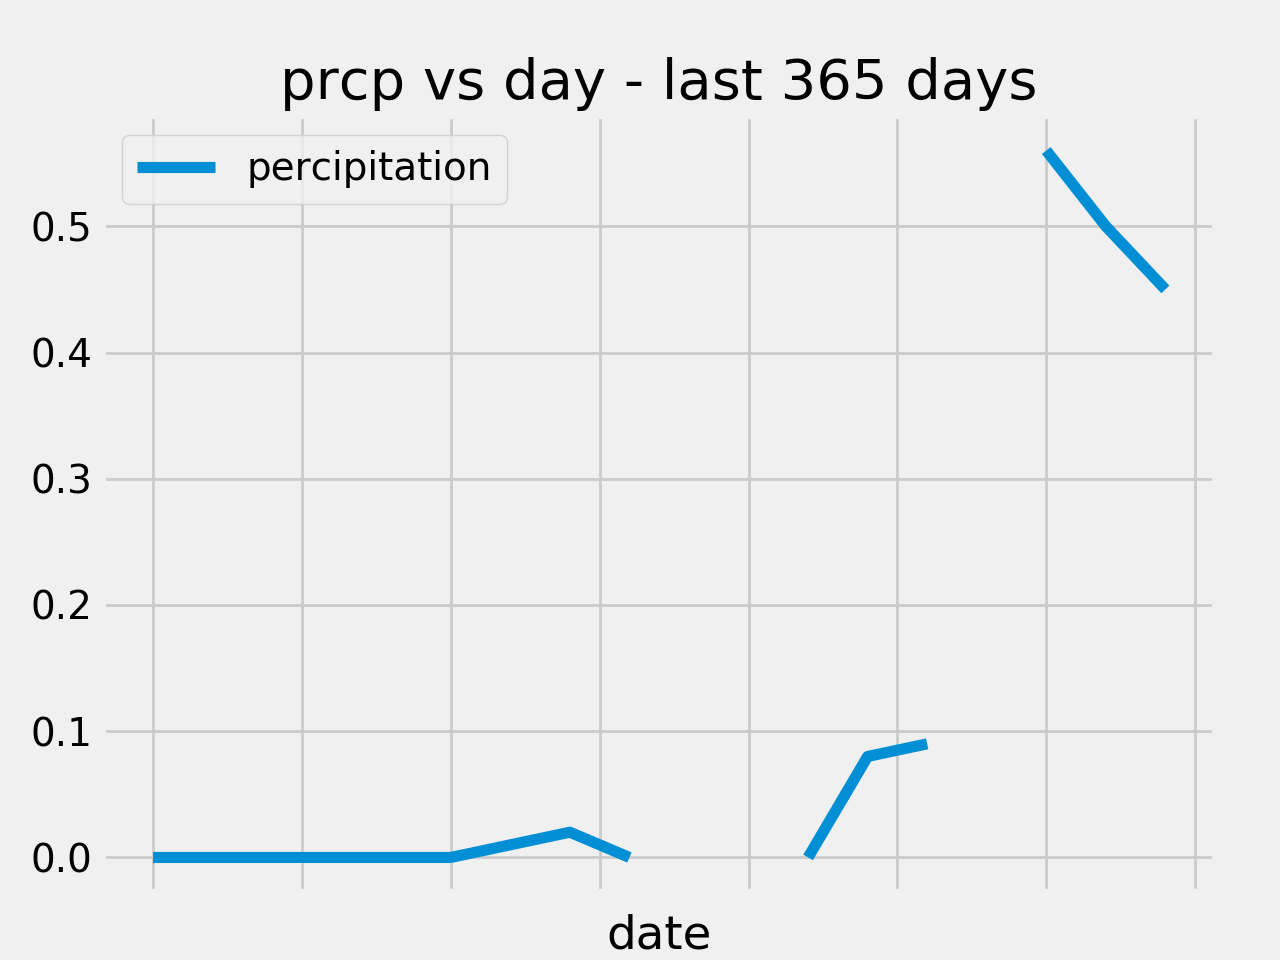

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
df365.plot( y = 'percipitation')
plt.title("prcp vs day - last 365 days") 
plt.show()
# Rotate the xticks for the dates


<b><font color='blue'>_(4.1) Visualizing the time series data for the entire data set_</font>

<IPython.core.display.Javascript object>


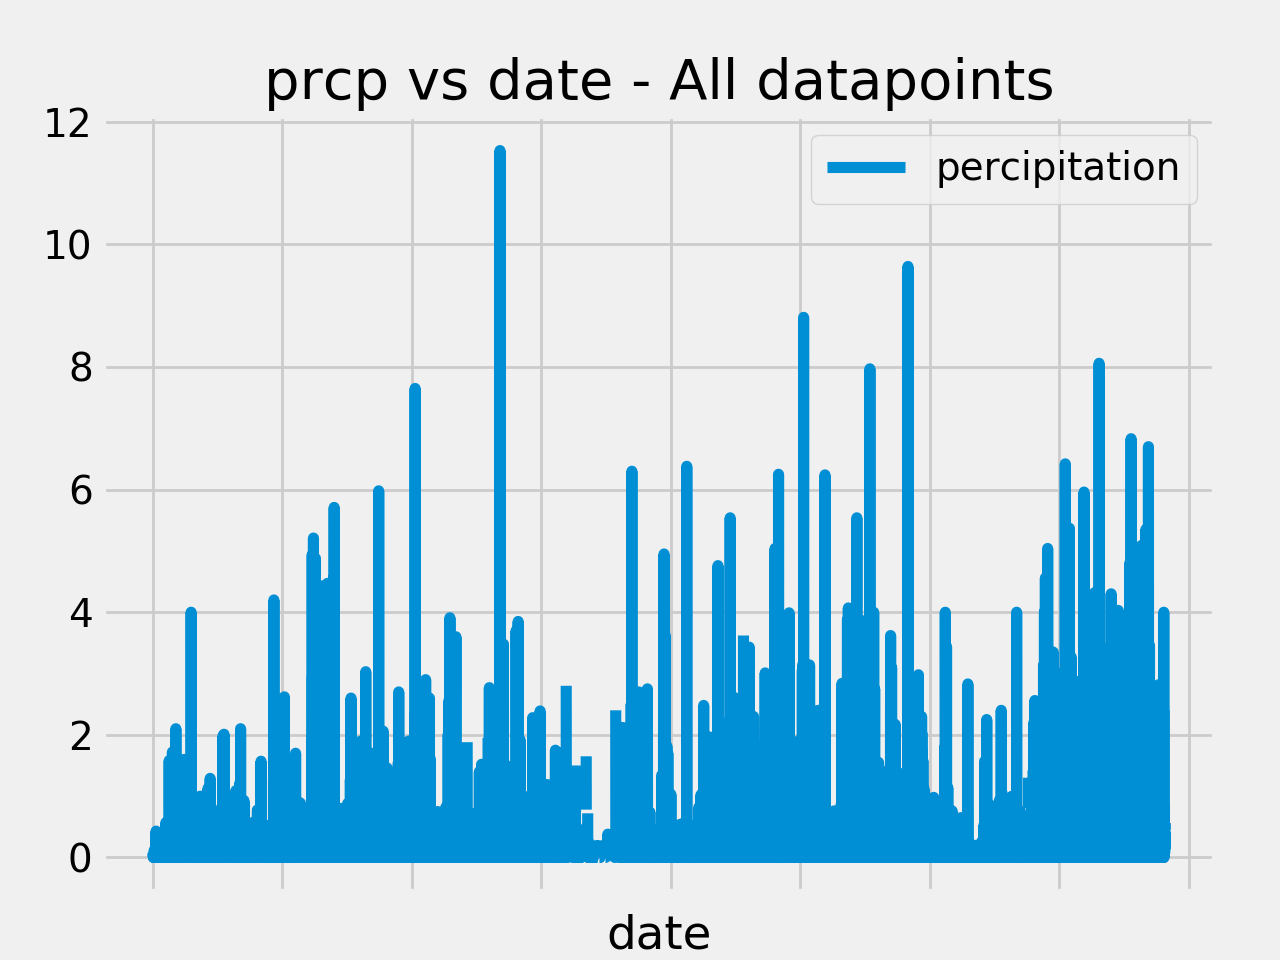

In [64]:
dfAll.plot( y = 'percipitation')
plt.title("prcp vs date - All datapoints")
plt.show()

<b><font color='blue'>_(5) Summarizing the data for last 365 days_</font>

In [65]:
df365.describe()

,percipitation
count,15.000000
mean,0.114000
std,0.204618
min,0.000000
25%,0.000000
50%,0.000000
75%,0.085000
max,0.560000


<b><font color='blue'>_(5.1) Summarizing the data for all data points_</font>

In [66]:
dfAll.describe()

,percipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


<b><font color='blue'>_(6) Number of Stations in the Dataset_</font>

In [76]:
measurementDataStation = session.query(Measurement.station).distinct().all()
measurementDataStation
dfmeasurementDataStation = pd.DataFrame(measurementDataStation, columns=['Station'])
dfmeasurementDataStation

,Station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


<b><font color='blue'>_(7) Station Count_</font>

In [80]:
measurementDataStationDetails = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
measurementDataStationDetails

dfmeasurementDataStationDetails = pd.DataFrame(measurementDataStationDetails, columns=['Station', 'Count'])
dfmeasurementDataStationDetails

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [82]:
dfmeasurementDataStationDetails['Station'][0]

'USC00519281'

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


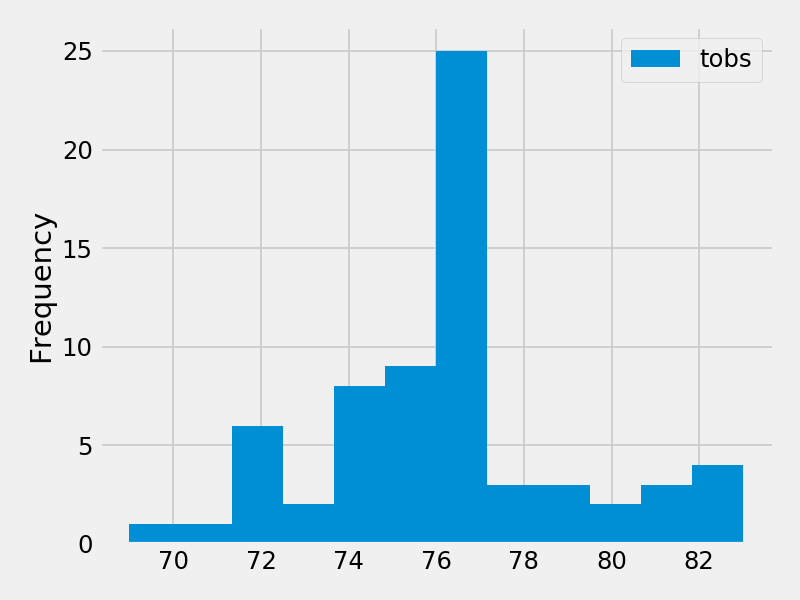

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


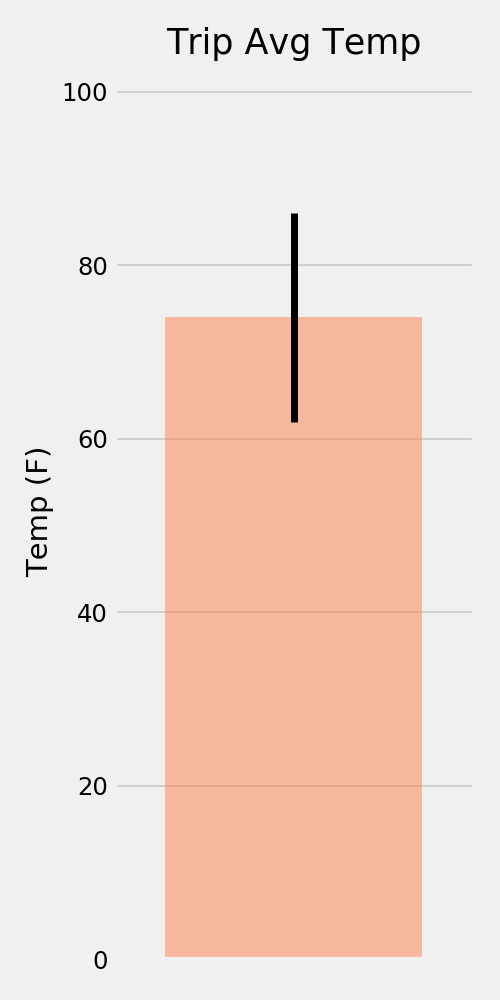

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


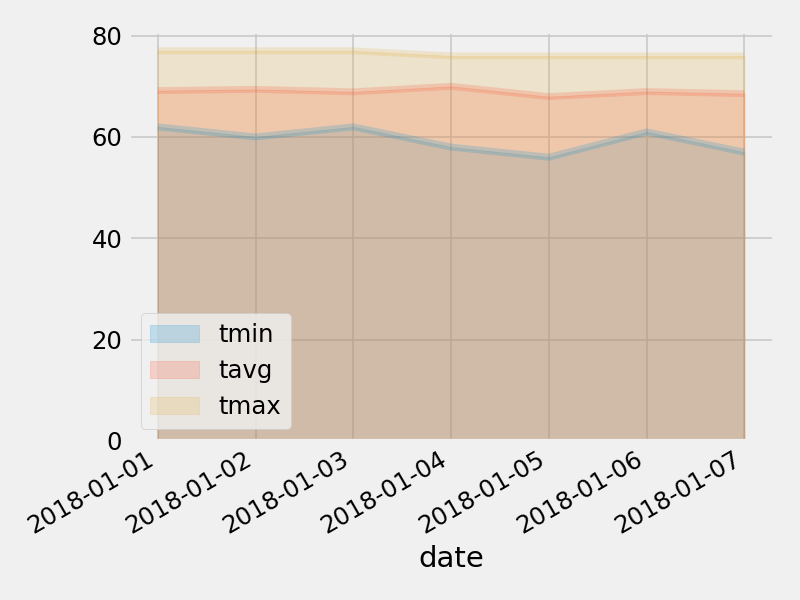

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
